#Depedencies and Setup

In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import faiss
import random
import time
import statistics

In [5]:
import zipfile
with zipfile.ZipFile("wher your zip file is", 'r') as zip_ref:
    zip_ref.extractall("archive")

In [6]:
flowers = pathlib.Path("archive/flowers")

In [8]:
data = tf.keras.preprocessing.image_dataset_from_directory(
  flowers,
  seed=123,
  image_size=(256, 256),
  batch_size=32)

class_names = data.class_names

In [ ]:
model = keras.models.load_model('flowers.h5')

#Sunflower Index

In [11]:
sunflower = pathlib.Path("archive/flowers/sunflower")
sunflowerdf = pd.DataFrame(columns=['filename', 'embedding4d', 'embedding2d'])
for item in sunflower.iterdir():
        filename = item.name
        img = keras.preprocessing.image.load_img(
            item, target_size=(256, 256)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        embedding4d = model.layers[-4].predict(img_array)
        embedding2d = embedding4d.reshape(8, 8*2048)
        mlist = [filename, embedding4d, embedding2d]
        sunflowerdf.loc[len(sunflowerdf)] = mlist

        

1/1 [==============================] - 0s 189ms/step


In [12]:
sunflowerdf.head()
for i in range(0, len(sunflowerdf)):
    sunflowerdf['embedding2d'][i] = sunflowerdf['embedding4d'][i].reshape(1, 8*8*2048)

In [13]:
sindex = faiss.IndexFlatL2(2048*8*8)
sindex.is_trained

True

In [14]:
for i in range(0, len(sunflowerdf)):
  sindex.add(sunflowerdf['embedding2d'][i])

In [15]:
k = 4
D, I = sindex.search(sunflowerdf.iat[0,2], k)  # search
print(I)

[[  0 714 211 428]]


In [16]:
mylist = sunflowerdf['filename'].iloc[[  0, 714, 211, 428]]
marray = np.array(mylist)

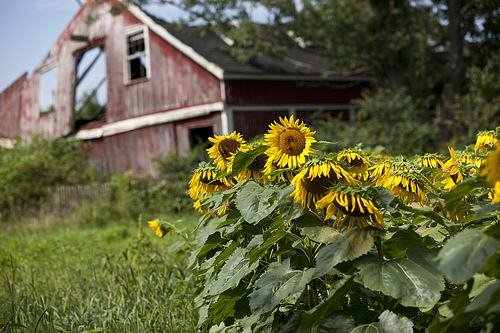

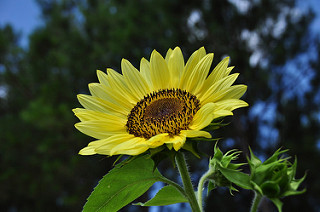

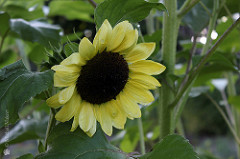

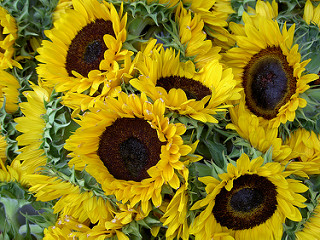

In [17]:
from PIL import Image
import os
import cv2
from google.colab.patches import cv2_imshow
for item in os.listdir("archive/flowers/sunflower"):
        if item in marray:
          img = cv2.imread(os.path.join("archive/flowers/sunflower", item))
          cv2_imshow(img)
          cv2.waitKey(5)
          cv2.destroyAllWindows()

#Daisy Index

In [18]:
daisy = pathlib.Path("archive/flowers/daisy")
daisydf = pd.DataFrame(columns=['filename', 'embedding4d', 'embedding2d'])
for item in daisy.iterdir():
        filename = item.name
        img = keras.preprocessing.image.load_img(
            item, target_size=(256, 256)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        embedding4d = model.layers[-4].predict(img_array)
        embedding2d = embedding4d.reshape(1, 8*8*2048)
        dlist = [filename, embedding4d, embedding2d]
        daisydf.loc[len(daisydf)] = dlist

        

1/1 [==============================] - 0s 199ms/step


In [19]:
dindex = faiss.IndexFlatL2(2048*8*8)
dindex.is_trained

True

In [20]:
for i in range(0, len(daisydf)):
  dindex.add(daisydf['embedding2d'][i])

In [21]:
k = 4
D, I = dindex.search(daisydf.iat[0,2], k)  # search
print(I)

[[  0 535 686 214]]


In [22]:
dylist = daisydf['filename'].iloc[[  0, 535, 686, 214]]
darray = np.array(dylist)

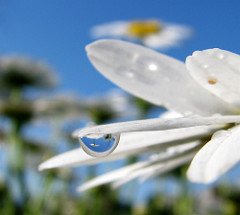

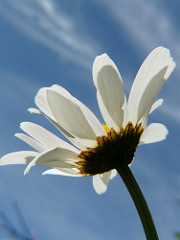

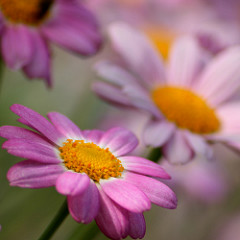

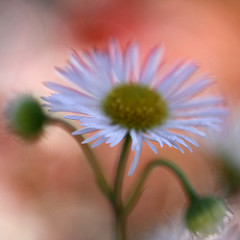

In [23]:
from PIL import Image
import os
import cv2
from google.colab.patches import cv2_imshow
for item in os.listdir("archive/flowers/daisy"):
        if item in darray:
          img = cv2.imread(os.path.join("archive/flowers/daisy", item))
          cv2_imshow(img)
          cv2.waitKey(5)
          cv2.destroyAllWindows()

#Tulip Index

In [24]:
tulip = pathlib.Path("archive/flowers/tulip")
tulipdf = pd.DataFrame(columns=['filename', 'embedding4d', 'embedding2d'])
for item in tulip.iterdir():
        filename = item.name
        img = keras.preprocessing.image.load_img(
            item, target_size=(256, 256)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        embedding4d = model.layers[-4].predict(img_array)
        embedding2d = embedding4d.reshape(1, 8*8*2048)
        tlist = [filename, embedding4d, embedding2d]
        tulipdf.loc[len(tulipdf)] = tlist

        

1/1 [==============================] - 0s 199ms/step


In [25]:
tindex = faiss.IndexFlatL2(2048*8*8)
tindex.is_trained

True

In [26]:
for i in range(0, len(tulipdf)):
  tindex.add(tulipdf['embedding2d'][i])

In [27]:
k = 4
D, I = tindex.search(tulipdf.iat[0,2], k)  # search
print(I)

[[  0 631 124  38]]


In [28]:
tylist = tulipdf['filename'].iloc[[  0, 631, 124,  38]]
tarray = np.array(tylist)

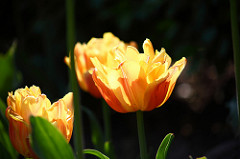

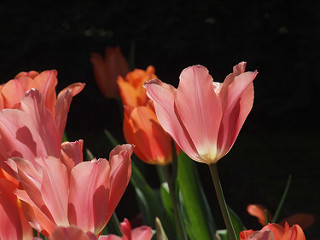

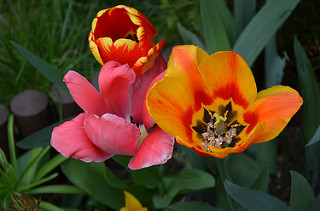

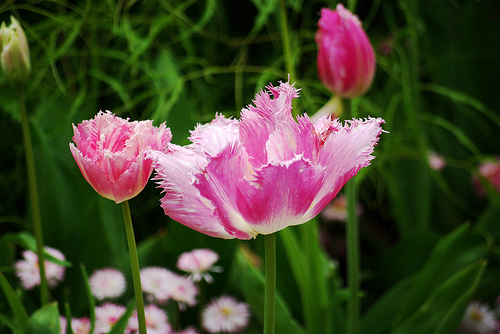

In [29]:
from PIL import Image
import os
import cv2
from google.colab.patches import cv2_imshow
for item in os.listdir("archive/flowers/tulip"):
        if item in tarray:
          img = cv2.imread(os.path.join("archive/flowers/tulip", item))
          cv2_imshow(img)
          cv2.waitKey(5)
          cv2.destroyAllWindows()

#dandelion Index

In [30]:
dandelion = pathlib.Path("archive/flowers/dandelion")
dandeliondf = pd.DataFrame(columns=['filename', 'embedding4d', 'embedding2d'])
for item in dandelion.iterdir():
        filename = item.name
        img = keras.preprocessing.image.load_img(
            item, target_size=(256, 256)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        embedding4d = model.layers[-4].predict(img_array)
        embedding2d = embedding4d.reshape(1, 8*8*2048)
        tlist = [filename, embedding4d, embedding2d]
        dandeliondf.loc[len(dandeliondf)] = tlist

        

1/1 [==============================] - 0s 193ms/step


In [31]:
daindex = faiss.IndexFlatL2(2048*8*8)
daindex.is_trained

True

In [32]:
for i in range(0, len(dandeliondf)):
  daindex.add(dandeliondf['embedding2d'][i])

In [33]:
k = 4
D, I = daindex.search(dandeliondf.iat[0,2], k)  # search
print(I)

[[  0 663 802 576]]


In [34]:
dalist = dandeliondf['filename'].iloc[[  0, 714, 211, 428]]
daarray = np.array(dalist)

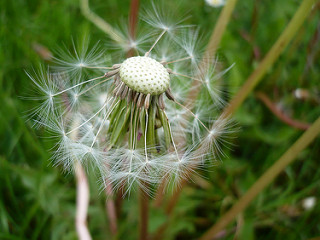

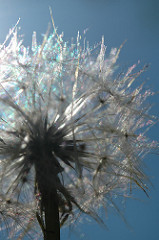

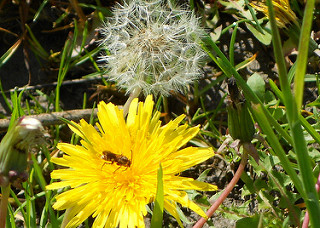

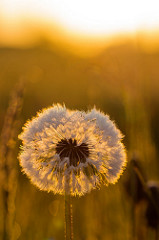

In [35]:
from PIL import Image
import os
import cv2
from google.colab.patches import cv2_imshow
for item in os.listdir("archive/flowers/dandelion"):
        if item in daarray:
          img = cv2.imread(os.path.join("archive/flowers/dandelion", item))
          cv2_imshow(img)
          cv2.waitKey(5)
          cv2.destroyAllWindows()

#rose Index

In [36]:
rose = pathlib.Path("archive/flowers/rose")
rosedf = pd.DataFrame(columns=['filename', 'embedding4d', 'embedding2d'])
for item in rose.iterdir():
        filename = item.name
        img = keras.preprocessing.image.load_img(
            item, target_size=(256, 256)
        )
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create a batch

        embedding4d = model.layers[-4].predict(img_array)
        embedding2d = embedding4d.reshape(1, 8*8*2048)
        tlist = [filename, embedding4d, embedding2d]
        rosedf.loc[len(rosedf)] = tlist

        

1/1 [==============================] - 0s 239ms/step


In [37]:
rindex = faiss.IndexFlatL2(2048*8*8)
rindex.is_trained

True

In [38]:
for i in range(0, len(rosedf)):
  rindex.add(rosedf['embedding2d'][i])

In [39]:
k = 4
D, I = rindex.search(rosedf.iat[0,2], k)  # search
print(I)

[[  0 388 133  89]]


In [40]:
rlist = rosedf['filename'].iloc[[  0, 714, 211, 428]]
rarray = np.array(rlist)

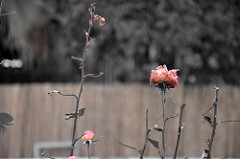

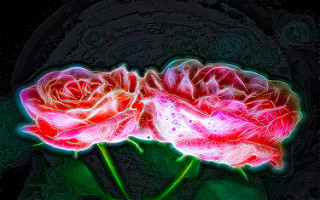

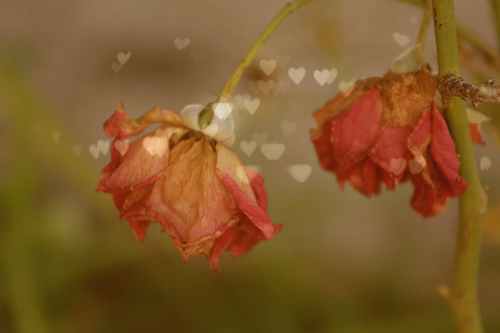

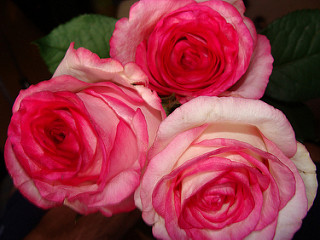

In [41]:
from PIL import Image
import os
import cv2
from google.colab.patches import cv2_imshow
for item in os.listdir("archive/flowers/rose"):
        if item in rarray:
          img = cv2.imread(os.path.join("archive/flowers/rose", item))
          cv2_imshow(img)
          cv2.waitKey(5)
          cv2.destroyAllWindows()

#Run time for stratified Indexes

In [151]:
np.random.seed(0)

def random_image():
    #get all subdirectories in the directory
    subdirectories = os.listdir("/content/archive/flowers")
    random_subdirectory = random.choice(subdirectories)
    images = os.listdir("/content/archive/flowers/" + random_subdirectory)
    #select a random image
    random_image = random.choice(images)
    #get the filepath of the image
    filepath = "/content/archive/flowers/" + random_subdirectory + '/' + random_image
    return filepath

def findksimilars(filepath, k = 4):
  img = keras.preprocessing.image.load_img(
            filepath, target_size=(256, 256)
        )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  embedding4d = model.layers[-4].predict(img_array, verbose=0)
  embedding2d = embedding4d.reshape(1, 8*8*2048)
  prediction = model.predict(img_array, verbose=0)
  score = tf.nn.softmax(prediction[0])
  prediction = class_names[np.argmax(score)]

  if prediction == "rose":
    d, I = rindex.search(embedding2d, k)

  if prediction == "daisy":
    d, I = dindex.search(embedding2d, k)

  if prediction == "sunflower":
    d, I = sindex.search(embedding2d, k)

  if prediction == "dandelion":
    d, I = daindex.search(embedding2d, k)

  if prediction == "tulip":
    d, I = tindex.search(embedding2d, k)
    
  
  return prediction, I, k
  

def time_function(function, arg):
    start = time.time()
    function(arg())
    end = time.time()
    return end - start


def aggregate():
    #create a list of times
    times = []
    #run the function 100 times
    for i in range(100):
        #get the time it took to run the function
        time = time_function(findksimilars, random_image)
        #add the time to the list of times
        times.append(time)
    #get the mean time
    mean = sum(times)/len(times)
    #get the standard deviation
    standard_deviation = statistics.stdev(times)
    #get the min time
    min_time = min(times)
    #get the max time
    max_time = max(times)
    #get the total time
    total_time = sum(times)
    #return the mean time, total time, and standard deviation, min, and max
    return mean, total_time, standard_deviation, min_time, max_time

results = pd.DataFrame(columns=['mean', 'total', 'standard_deviation', 'min', 'max'])

results.loc['get_random_image'] = aggregate()



In [61]:
results.head()
results.to_csv('results.csv')

In [154]:
import matplotlib.image as mpimg

np.random.seed(0)

def matchingimages(I,  prediction, k):
    images = []
    if prediction == "rose":
        rlist = rosedf['filename'].iloc[I[0]]
        rarray = np.array(rlist)
        for item in os.listdir("archive/flowers/rose"):
            if item in rarray:
                #store the filepath of image in a list
                images.append(os.path.join("archive/flowers/rose", item))
        # display images as a grid graph
    
    if prediction == "daisy":

        dlist = daisydf['filename'].iloc[I[0]]
        darray = np.array(dlist)
        for item in os.listdir("archive/flowers/daisy"):
            if item in darray:
                images.append(os.path.join("archive/flowers/daisy", item))


    if prediction == "sunflower":
        slist = sunflowerdf['filename'].iloc[I[0]]
        sarray = np.array(slist)
        for item in os.listdir("archive/flowers/sunflower"):
            if item in sarray:
                images.append(os.path.join("archive/flowers/sunflower", item))

    if prediction == "dandelion":
        dalist = dandeliondf['filename'].iloc[I[0]]
        daarray = np.array(dalist)
        for item in os.listdir("archive/flowers/dandelion"):
            if item in daarray:
                images.append(os.path.join("archive/flowers/dandelion", item))
                

    if prediction == "tulip":
        tlist = tulipdf['filename'].iloc[I[0]]
        tarray = np.array(tlist)
        for item in os.listdir("archive/flowers/tulip"):
            if item in tarray:
                images.append(os.path.join("archive/flowers/tulip", item))
                

    fig = plt.figure(figsize=(10, 10))
    for i in range(1, len(images)):
        img = mpimg.imread(images[i-1])
        fig.add_subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')

prediction, I,  k = findksimilars("/content/archive/flowers/rose/10090824183_d02c613f10_m.jpg", 9)

matchingimages(I,  prediction, k)

plt.savefig('stratimages.png')


<Figure size 720x720 with 0 Axes>

#All flowers Index

In [86]:
#append all df

dandeliondf["type"] = "dandelion"
sunflowerdf["type"] = "sunflower"
daisydf["type"] = "daisy"
tulipdf["type"] = "tulip"
rosedf["type"] = "rose"
flowerdf = pd.concat([dandeliondf, sunflowerdf, daisydf, tulipdf, rosedf], ignore_index=True)
flowerdf.head()

,filename,embedding4d,embedding2d,type
0,4624036600_11a4744254_n.jpg,"[[[[0. 0. 0. ... 0. 0. 0.], [0. 0. 0. ... 0. 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.3033, 0.0, 0...",dandelion
1,2518321294_dde5aa7c20_m.jpg,[[[[ 0. 0. 50.911232 ... 0. ...,"[[0.0, 0.0, 50.911232, 0.0, 0.0, 0.0, 50.66363...",dandelion
2,3581252194_8c976d333a_n.jpg,"[[[[0. 0. 0. ... 0. 0. 0.], [0. 0. 0. ... 0. 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",dandelion
3,33881120324_552f677c1a_n.jpg,[[[[ 0. 4.5772552 40.228943 ... 0. ...,"[[0.0, 4.5772552, 40.228943, 0.0, 0.0, 0.0, 45...",dandelion
4,2161283279_02ea3ff8d4.jpg,"[[[[0. 0. 0. ... 0. 0. 0.], [0. 0. 0. ... 0. 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",dandelion


In [87]:
findex = faiss.IndexFlatL2(2048*8*8)
findex.is_trained


True

In [88]:
for i in range(0, len(flowerdf)):
  findex.add(flowerdf['embedding2d'][i])

In [89]:
np.random.seed(0)

def random_image():
    #get all subdirectories in the directory
    subdirectories = os.listdir("/content/archive/flowers")
    random_subdirectory = random.choice(subdirectories)
    images = os.listdir("/content/archive/flowers/" + random_subdirectory)
    #select a random image
    random_image = random.choice(images)
    #get the filepath of the image
    filepath = "/content/archive/flowers/" + random_subdirectory + '/' + random_image
    return filepath

def findksimilars(filepath, k = 4):
  img = keras.preprocessing.image.load_img(
            filepath, target_size=(256, 256)
        )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  embedding4d = model.layers[-4].predict(img_array, verbose=0)
  embedding2d = embedding4d.reshape(1, 8*8*2048)

  d, I = findex.search(embedding2d, k)

  
  return I, k
  

def time_function(function, arg):
    start = time.time()
    function(arg())
    end = time.time()
    return end - start


def aggregate():
    #create a list of times
    times = []
    #run the function 100 times
    for i in range(100):
        #get the time it took to run the function
        time = time_function(findksimilars, random_image)
        #add the time to the list of times
        times.append(time)
    #get the mean time
    mean = sum(times)/len(times)
    #get the standard deviation
    standard_deviation = statistics.stdev(times)
    #get the min time
    min_time = min(times)
    #get the max time
    max_time = max(times)
    #get the total time
    total_time = sum(times)
    #return the mean time, total time, and standard deviation, min, and max
    return mean, total_time, standard_deviation, min_time, max_time

results = pd.DataFrame(columns=['mean', 'total', 'standard_deviation', 'min', 'max'])

results.loc['get_random_image'] = aggregate()



In [90]:
results.head()

,mean,total,standard_deviation,min,max
get_random_image,0.776261,77.626076,0.067695,0.745287,1.186828


In [127]:
flowerdf1 = pd.concat([dandeliondf, sunflowerdf, daisydf, tulipdf, rosedf], ignore_index=True)
flowerdf1.head()

,filename,embedding4d,embedding2d,type
0,archive/flowers/danelion/4624036600_11a4744254...,"[[[[0. 0. 0. ... 0. 0. 0.], [0. 0. 0. ... 0. 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.3033, 0.0, 0...",dandelion
1,archive/flowers/danelion/2518321294_dde5aa7c20...,[[[[ 0. 0. 50.911232 ... 0. ...,"[[0.0, 0.0, 50.911232, 0.0, 0.0, 0.0, 50.66363...",dandelion
2,archive/flowers/danelion/3581252194_8c976d333a...,"[[[[0. 0. 0. ... 0. 0. 0.], [0. 0. 0. ... 0. 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",dandelion
3,archive/flowers/danelion/33881120324_552f677c1...,[[[[ 0. 4.5772552 40.228943 ... 0. ...,"[[0.0, 4.5772552, 40.228943, 0.0, 0.0, 0.0, 45...",dandelion
4,archive/flowers/danelion/2161283279_02ea3ff8d4...,"[[[[0. 0. 0. ... 0. 0. 0.], [0. 0. 0. ... 0. 0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",dandelion


archive/flowers/rose/10090824183_d02c613f10_m.jpg
archive/flowers/daisy/8616684075_71923bb771_n.jpg
archive/flowers/rose/5083072098_81587295d5.jpg
archive/flowers/daisy/5673728_71b8cb57eb.jpg


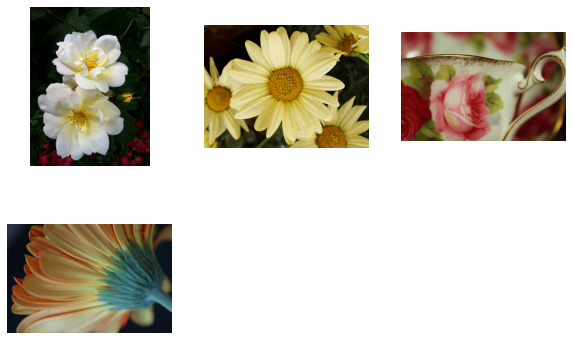

In [149]:
def matchingimages(I, k):

    ilist = flowerdf1['filename'].iloc[I[0]]
    images = np.array(ilist)
    ideas = []
    for i in images:
    #letters in string remove
      if 'archive/flowers/rose/archive/flowers/rosearchive/flowers/rose' in i:
          i = i.replace('archive/flowers/rose/archive/flowers/rosearchive/flowers/rose', '')
          i = 'archive/flowers/rose/' + i
      if 'archive/flowers/tulip/archive/flowers/tuliparchive/flowers/tulip' in i:
          i = i.replace('archive/flowers/tulip/archive/flowers/tuliparchive/flowers/tulip', '')
          i = 'archive/flowers/tulip/' + i
      if 'archive/flowers/daisy/archive/flowers/daisyarchive/flowers/daisy' in i:
          i = i.replace('archive/flowers/daisy/archive/flowers/daisyarchive/flowers/daisy', '')
          i = 'archive/flowers/daisy/' + i
      if 'archive/flowers/sunflower/archive/flowers/sunflowerarchive/flowers/sunflower' in i:
          i = i.replace('archive/flowers/sunflower/archive/flowers/sunflowerarchive/flowers/sunflower', '')
          i = 'archive/flowers/sunflower/' + i
      if 'archive/flowers/danelion/archive/flowers/danelionarchive/flowers/danelion' in i:
          i = i.replace('archive/flowers/danelion/archive/flowers/danelionarchive/flowers/danelion', '')
          i = 'archive/flowers/dandelion/' + i
      ideas.append(i)

    fig = plt.figure(figsize=(10, 10))
    for i in range(1, len(ideas)+1):
        print(ideas[i-1])
        img = mpimg.imread(ideas[i-1])
        fig.add_subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')


I,  k = findksimilars("/content/archive/flowers/rose/10090824183_d02c613f10_m.jpg", 9)

matchingimages(I, k)

plt.savefig('stratimages.png')
